In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import time

In [3]:
#Load data
data = pd.read_csv(r"C:\Users\irola\Desktop\Dataset2\DogMoveData_csv_format_2\DogMoveData_merged_2.csv")

In [4]:
# Split dataset in features and target variable
feature_cols = ['ABack_x', 'ABack_y', 'ABack_z', 'ANeck_x', 'ANeck_y', 'ANeck_z', 'GBack_x', 'GBack_y', 'GBack_z', 'GNeck_x', 'GNeck_y', 'GNeck_z']
X = data[feature_cols]  # Features
y = data['Behavior']    # Target variable

In [5]:
# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode categorical labels into numeric values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Define optimized base models
base_models = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5, random_state=42)),
    ('naive_bayes', GaussianNB()),
    ('gradient_boosting', HistGradientBoostingClassifier(max_iter=50, random_state=42)),
]

In [6]:
# Create the stacking classifier with Logistic Regression as the final estimator
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), n_jobs=-1, cv=3)

# Measure the start time
start_time = time.time()

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Measure the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Make predictions
y_pred = stacking_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print elapsed time
print("Elapsed Time:", elapsed_time, "seconds")

C:\Users\irola\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9083565468840088
Elapsed Time: 598.3099908828735 seconds


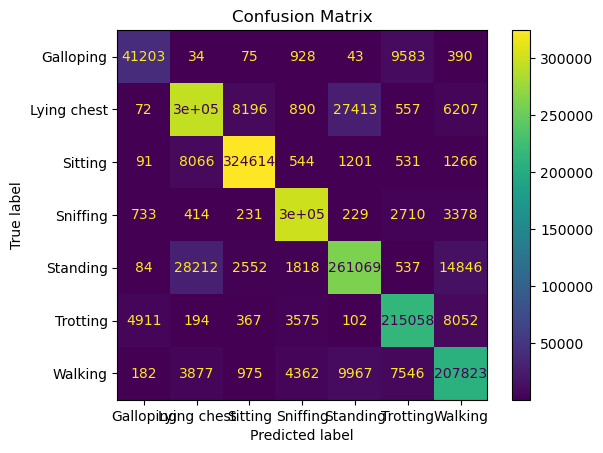

              precision    recall  f1-score   support

   Galloping       0.87      0.79      0.83     52256
 Lying chest       0.88      0.87      0.88    338474
     Sitting       0.96      0.97      0.96    336313
    Sniffing       0.96      0.97      0.97    307572
    Standing       0.87      0.84      0.86    309118
    Trotting       0.91      0.93      0.92    232259
     Walking       0.86      0.89      0.87    234732

    accuracy                           0.91   1810724
   macro avg       0.90      0.89      0.90   1810724
weighted avg       0.91      0.91      0.91   1810724



In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))